## Intrusion Detection Systems - Anamoly Dectection
**Problem:** Supervised Binary Classification Problem for Intrusion Detection Systems i.e., BENIGN or DoS

### Business Understanding: 
**DOS**: Flooding the targeted machine or resource with superfluous requests in an attempt to overload systems and prevent some or all legitimate requests from being fulfilled.
Process:
- Holds the connection open by sending valid, incomplete HTTP requests to the server at regular intervals to keep the sockets from closing.
- By repeatedly sending initial connection request (SYN) packets(Getting ACK packet from server and not sending back 3rd handshake ACK packet while the server waits at that port forever), the attacker is able to overwhelm all available ports on a targeted server machine. [Read More Here](https://www.cloudflare.com/learning/ddos/syn-flood-ddos-attack/)
- a time delay between successive attacking packets.
- HTTP slow POST DoS attack: sends large content length header and sends content very slow speed.- the attacker sends traffic consisting of complicated requests to the system.


### Data Understanding:
**IAT**- Interarrival times (Difference Arrival time b/w 2 packets in Server)      
**Flags**- Flags in the headers of packets (Push ﬂags, Urgent ﬂags, Finish ﬂags, etc.)          
**Subflows**- Single TCP connection but multiple subflows to transfer data.    
**Flow Duration** The total duration of the flow.    
**Total Length** of Fwd Packets The total number of packets in the forward direction.    
**Total Length** of Bwd Packets The total number of packets in the backward direction.    
**Fwd Packet Length Mean** The mean value in bytes of the packets length in the forward
direction.    
**Bwd Packet Length Min** The minimum value in bytes of the packets length in the backward direction.    
**Flow Bytes/s** The number of bytes per second in the flow.          
**Flow Packets/s** The number of packets per second in the flow.     
**Flow IAT Mean** The mean value of the inter-arrival time of the flow (in both
directions).     
**Flow IAT Min** The minimum value of the inter-arrival time of the flow (in both
directions).     
**Bwd Packets/s** The number of bytes per second in the flow.     
**Average Packet Size** The average size of each packet. It is important to notice that
Packet Length specify the size of the whole packet including the
header, trailer and the data that send on that packet. But Packet
Size specify only the size of the header on the packet.     
**Active Std** Standard deviation time a flow was active before becoming idle.    
**Active Max** Maximum time a flow was active before becoming idle.    
**Active Min** Minimum time a flow was active before becoming idle    

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/IDS_train_data.csv") as f:
    print(f)

<_io.TextIOWrapper name='../Data/IDS_train_data.csv' mode='r' encoding='UTF-8'>


In [3]:
train_df = pd.read_csv('../Data/IDS_train_data.csv')
train_df = train_df[ train_df['Label'] != 'Heartbleed' ]    # removing Heartbleed data
train_df.shape

(519519, 80)

In [4]:
# train_df.info() => all dtypes are either int64 or float64 and Label is object

In [5]:
train_df.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,80,85751547,8,7,372,11595,372,0,46.500000,131.521861,4344,0,1656.428571,1757.579003,1.395543e+02,0.174924,6.125110e+06,2.290000e+07,85600000,4,85600000,1.220000e+07,3.240000e+07,85600000,4,145737,24289.5,5.269858e+04,131258,16,0,0,0,0,264,232,0.093293,0.081631,0,4344,747.937500,1388.731050,1928573.929,0,0,0,0,1,0,0,0,0,797.800000,46.500000,1656.428571,264,0,0,0,0,0,0,8,372,7,11595,274,235,1,32,1174.0,0.0,1174,1174,85600000.0,0.0,85600000,85600000,DoS
1,1,80,99566897,6,7,368,11595,350,0,61.333333,141.447752,7240,0,1656.428571,2698.609263,1.201504e+02,0.130565,8.297241e+06,2.870000e+07,99500000,4,99500000,1.990000e+07,4.450000e+07,99500000,4,99600000,16600000.0,4.060000e+07,99500000,83,0,0,0,0,164,232,0.060261,0.070304,0,7240,854.928571,2015.158801,4060864.995,1,0,0,0,0,0,0,0,1,920.692308,61.333333,1656.428571,164,0,0,0,0,0,0,6,368,7,11595,0,235,3,20,11988.0,0.0,11988,11988,99500000.0,0.0,99500000,99500000,DoS
2,2,53,6883111,4,4,162,598,41,40,40.500000,0.577350,226,73,149.500000,88.334591,1.104152e+02,1.162265,9.833016e+05,2.580996e+06,6836319,3,6836485,2.278828e+06,3.947041e+06,6836479,3,6882951,2294317.0,3.973868e+06,6882945,3,0,0,0,0,80,80,0.581133,0.581133,40,226,89.000000,78.870146,6220.500,0,0,0,0,0,0,0,0,1,100.125000,40.500000,149.500000,80,0,0,0,0,0,0,4,162,4,598,-1,-1,3,20,163.0,0.0,163,163,6836319.0,0.0,6836319,6836319,BENIGN
3,3,443,4,3,0,18,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.500000e+06,750000.000000,2.000000e+00,1.414214e+00,3,1,4,2.000000e+00,1.414214e+00,3,1,0,0.0,0.000000e+00,0,0,0,0,0,0,60,0,750000.000000,0.000000,6,6,6.000000,0.000000,0.000,1,0,0,0,0,0,0,0,0,8.000000,6.000000,0.000000,60,0,0,0,0,0,0,3,18,0,0,0,-1,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,443,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4,4,4,4.000000e+00,0.000000e+00,4,4,0,0.0,0.000000e+00,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000,1,0,0,0,0,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## EDA - Exploratory Data Analysis

In [6]:
# We can see there are "infinity" values in Flow Bytes/s and Flow Packets/s
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,519519.0,2.597640e+05,1.499748e+05,0.0,129881.500000,259765.000000,3.896455e+05,5.195260e+05
Destination Port,519519.0,5.658277e+03,1.569336e+04,0.0,53.000000,80.000000,4.430000e+02,6.548700e+04
Flow Duration,519519.0,2.799290e+07,4.274985e+07,-1.0,202.000000,61517.000000,8.299796e+07,1.200000e+08
Total Fwd Packets,519519.0,9.334021e+00,7.287958e+02,1.0,2.000000,2.000000,7.000000e+00,2.039430e+05
Total Backward Packets,519519.0,9.938693e+00,9.588196e+02,0.0,1.000000,2.000000,6.000000e+00,2.723530e+05
Total Length of Fwd Packets,519519.0,5.555669e+02,6.203656e+03,0.0,12.000000,82.000000,3.650000e+02,1.224076e+06
Total Length of Bwd Packets,519519.0,1.634514e+04,2.194385e+06,0.0,0.000000,188.000000,1.159500e+04,6.270000e+08
Fwd Packet Length Max,519519.0,2.334783e+02,6.049516e+02,0.0,6.000000,46.000000,3.410000e+02,2.482000e+04
Fwd Packet Length Min,519519.0,1.499361e+01,5.029643e+01,0.0,0.000000,0.000000,3.200000e+01,2.065000e+03
Fwd Packet Length Mean,519519.0,6.051351e+01,1.574540e+02,0.0,6.000000,41.000000,5.679474e+01,4.640758e+03


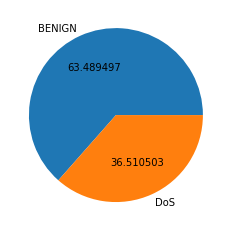

In [7]:
# is the Data balanced? -> partially
plt.pie(x=train_df['Label'].value_counts(), autopct="%f", labels=['BENIGN','DoS'] );

In [8]:
# So there are missing values -> yes
[f'{f} -> {str(s)}' for f,s in zip(train_df.columns, train_df.isna().sum()) if s>0 ]

['Flow Bytes/s -> 766']

**Is there any Effect of "missing values" on target variable?**

DoS       722
BENIGN    261
Name: Label, dtype: int64


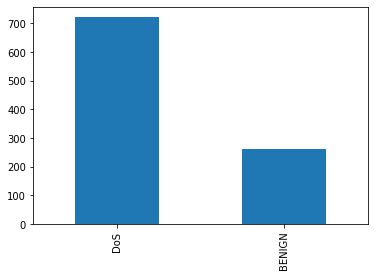

In [9]:
# --> yes
x = train_df[train_df['Flow Packets/s'] == np.inf]['Label'].value_counts()
print(x)
x.plot.bar();

In [8]:
# --> No
train_df[train_df['Flow Bytes/s'] == np.inf]['Label'].value_counts()

BENIGN    217
Name: Label, dtype: int64

Majority of the time 'Flow Packets' with 'infinity' value is DoS *attack*

In [210]:
def plot_histogram(cols:list):
    attack = train_df[ train_df['Label']=='DoS' ]
    normal = train_df[ train_df['Label']=='BENIGN' ]
    plt.figure(figsize=(20,5))
    for i,col in enumerate(cols, start=1):
        plt.subplot(1,len(cols),i)
        sns.distplot(np.array(attack[col]), label='DoS')            # used np.array because otherwise some cols used to error: could not convert string to float: 'scott'
        sns.distplot(np.array(normal[col]), label='BENIGN')
        plt.ylabel("Number of Packets"); plt.xlabel(col);
        plt.tight_layout(); plt.legend();

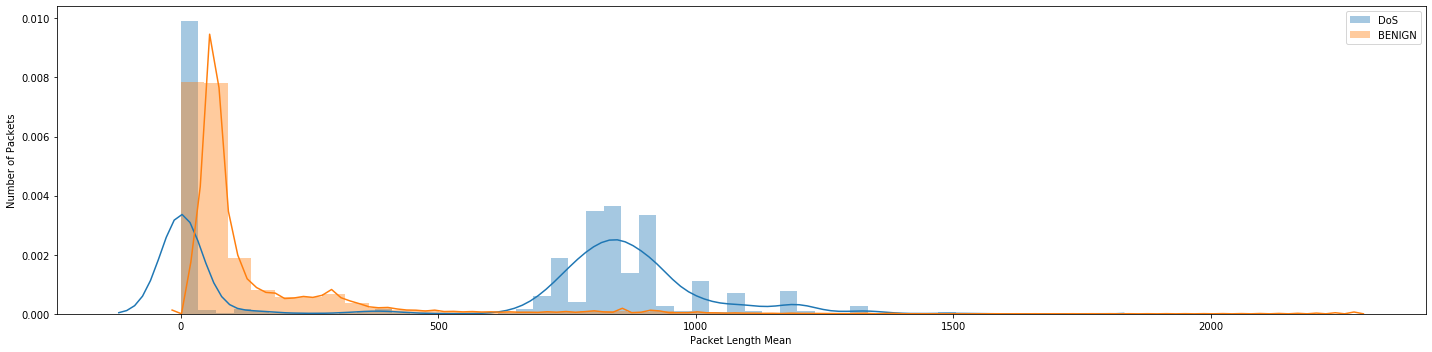

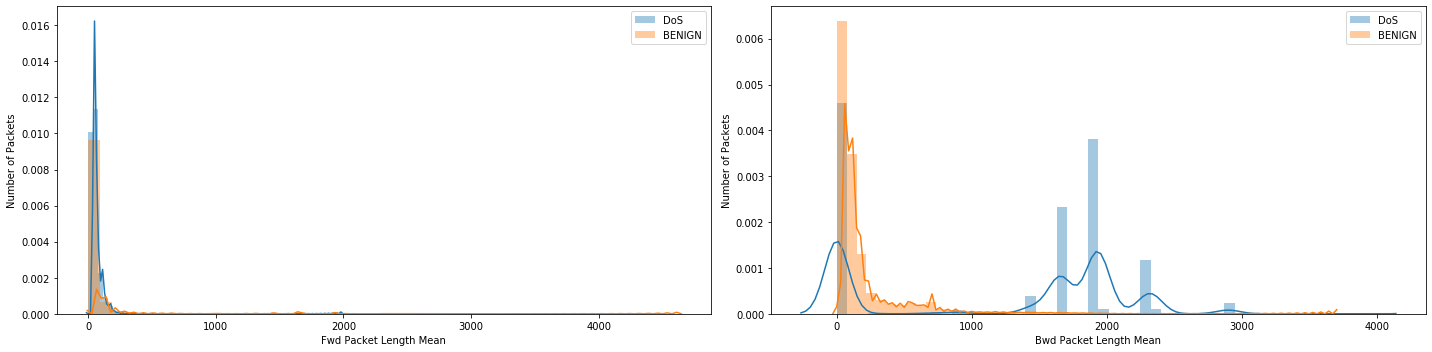

In [211]:
plot_histogram(['Packet Length Mean'])
plot_histogram(['Fwd Packet Length Mean','Bwd Packet Length Mean'])

We can observe that Mean Packet length of the DoS attack is large. Also,    
In DoS attacks, forward packet length is mostly small and following up backward packet's mean length is often large.

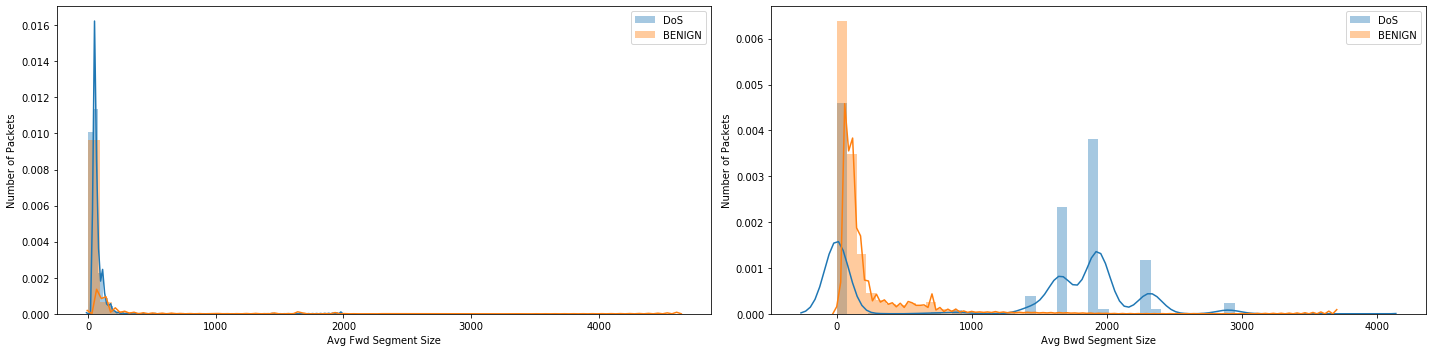

In [212]:
plot_histogram(['Avg Fwd Segment Size','Avg Bwd Segment Size'])

Most DoS attacks have Average Segment sizes very small whereas the average Backward Segment sizes are higher when compared to BENIGN situation.

In [155]:
def plot_boxplots(cols:list):
    for i,col in enumerate(cols, start=1):
        plt.subplot(1,len(cols),i)
        sns.violinplot(x="Label", y=np.array(train_df[col]), data=train_df);
    plt.tight_layout()

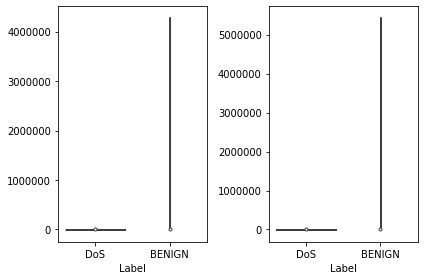

In [156]:
plot_boxplots(['Fwd Header Length','Bwd Header Length'])

DoS attacks does not send send or receive big headers.

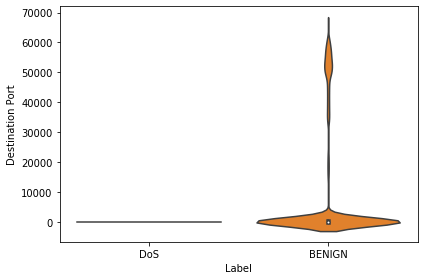

In [135]:
plot_boxplots(['Destination Port'])

In [134]:
train_df[ train_df['Label']=='DoS' ]['Destination Port'].value_counts()

80    189679
Name: Destination Port, dtype: int64

**All** DoS attacks occur on single Port i.e., 80

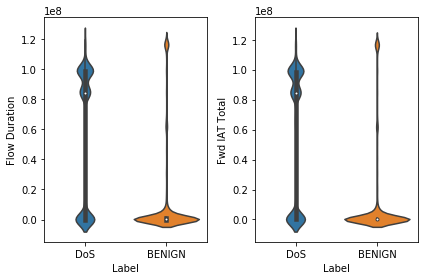

In [136]:
plot_boxplots(['Flow Duration','Fwd IAT Total'])

There's higher chance that if Flow Duration and/or is Forward Interarival time is larger, it is a DoS attack. 

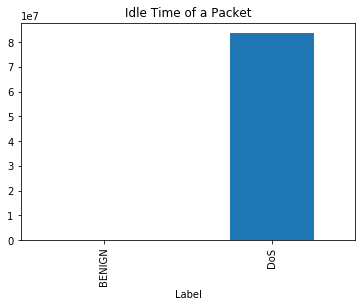

In [168]:
plt.title("Idle Time of a Packet")
train_df.groupby('Label').median()['Idle Mean'].plot.bar();

We can see that in DoS attacks, the Idle waiting time is much more.    
And since the Idle time is skewed distribution, I'm considering the median value for comparision.

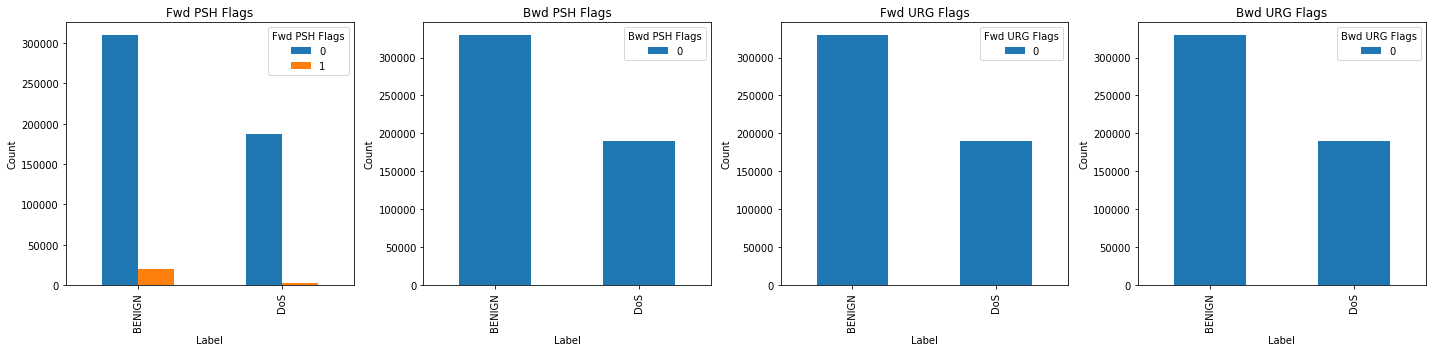

In [195]:
flags = ['Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags']
plt.figure(figsize=(20,5))
for i,flag in enumerate(flags,start=1):
    pd.crosstab(train_df['Label'], train_df[flag]).plot.bar(ax=plt.subplot(1,len(flags),i))
    plt.title(flag); plt.ylabel('Count')
plt.tight_layout()

It looks like 'Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags' flags are always 0 and hence not important.
Whereas, Fwd PSH Flags' does not have any significant importance.

## Data Preparation

In [206]:
# missing Values
train_df['Flow Bytes/s_missing'] = train_df['Flow Bytes/s'].apply(lambda x: 1 if np.isnan(x) else 0)
train_df['Flow Bytes/s'].fillna(-10, inplace=True)
train_df['Flow Bytes/s'].isna().sum()

0

In [207]:
# inf Values 
fb, fp = train_df['Flow Bytes/s'].quantile(0.99),train_df['Flow Packets/s'].quantile(0.99)
train_df['Flow Bytes/s'] = train_df['Flow Bytes/s'].apply(lambda x: fb*10000 if np.isinf(x) else x)
train_df['Flow Packets/s'] = train_df['Flow Packets/s'].apply(lambda x: fp*10000 if np.isinf(x) else x)

In [208]:
# drop singleton na's
train_df.dropna(inplace=True)
[f'{f} -> {str(s)}' for f,s in zip(train_df.columns, train_df.isna().sum()) if s>0 ]

[]

In [209]:
# Split X & y
X = train_df.drop(labels=['Label','ID'], axis=1)
y = train_df['Label']

In [211]:
y[:5]

0       DoS
1       DoS
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

In [212]:
# encode target
from sklearn.preprocessing import LabelEncoder

# fit
target_encoder = LabelEncoder()
target_encoder.fit(y)

# save encoder
pickle.dump(target_encoder, open('encoder.pkl', 'wb'))

# transform
y = target_encoder.transform(y)
target_encoder.classes_

array(['BENIGN', 'DoS'], dtype=object)

In [213]:
target_encoder.inverse_transform(y)

array(['DoS', 'DoS', 'BENIGN', ..., 'DoS', 'BENIGN', 'BENIGN'],
      dtype=object)

In [214]:
y

array([1, 1, 0, ..., 1, 0, 0])

Means now,    
1 => DoS attack,   
0 => BENIGN 

## Base Modelling

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363663, 79), (155856, 79), (363663,), (155856,))

In [197]:
from xgboost import XGBClassifier #,GradientBoostingClassifier, AdaBoostClassifier

model_xg = XGBClassifier(n_jobs=-1)
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
# see model score and predict -> default accuracy metric
print(model_xg.score(X_val, y_val))

0.99978184991274


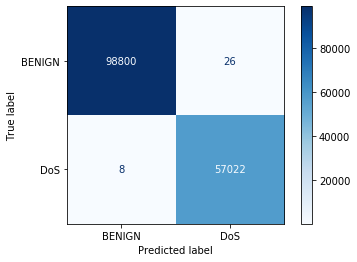

In [199]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_xg, X_val, y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);

We'll need to focus on False negatives(7 here) here i.e., there's an attack but model predicted it's benign and     

therefore accuracy metric of **Recall matters**. Thus current model did very well.

In [200]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     98826
           1       0.37      0.37      0.37     57030

    accuracy                           0.54    155856
   macro avg       0.50      0.50      0.50    155856
weighted avg       0.54      0.54      0.54    155856



**Our Model is performing very well, let's see if it can work better**

## Model Tuning
Let's improve our recall by passing scoring parameter as recall in RandomisedSearchCV

In [278]:
from sklearn.metrics import recall_score, make_scorer

# RandomisedSearchCV
params = {  'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6],
            'n_estimators': [100,150,200,250],
            'max_depth':[3,4,6,10],
            'gamma': [0,0.5,1],
            'n_jobs':[-1],
}

from sklearn.model_selection import RandomizedSearchCV
model_rs = RandomizedSearchCV(model_xg, params, random_state=42, cv=2, verbose=1, n_jobs=-1, 
                              scoring=make_scorer(recall_score))
search = model_rs.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.0min finished


In [280]:
# see model score and predict -> default accuracy metric
search.best_score_

0.9997888800084448

In [205]:
# Best model's hyper-parameters
search.best_params_

{'n_jobs': -1,
 'n_estimators': 150,
 'max_depth': 4,
 'learning_rate': 0.4,
 'gamma': 0.5,
 'colsample_bytree': 1}

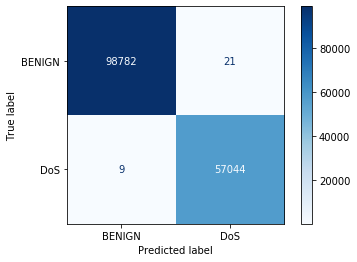

In [281]:
plot_confusion_matrix(search, X_val, y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);

**Greate, that's what we wanted**, our recall reduced. We might still improve our Recall, but let's focus on other things.

In [283]:
y_preds = search.predict(X_val)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98803
           1       1.00      1.00      1.00     57053

    accuracy                           1.00    155856
   macro avg       1.00      1.00      1.00    155856
weighted avg       1.00      1.00      1.00    155856



In [20]:
# GridSearchCV
params = {  'learning_rate': [0.3,0.33,0.35,0.4,0.43],
            'n_estimators': [130,150],
            'max_depth':[4,5],
            'gamma': [0,0.5,1],
}

from xgboost import XGBClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import GridSearchCV
model_gs = GridSearchCV(XGBClassifier(n_jobs=-1), params, cv=2, verbose=1, n_jobs=-1, 
                              scoring=make_scorer(recall_score))
search2 = model_gs.fit(X_train, y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 84.9min finished


In [21]:
# see model score and predict -> default accuracy metric
search2.best_score_

0.9998644225530511

In [23]:
# Best model's hyper-parameters
search2.best_params_

{'gamma': 0, 'learning_rate': 0.43, 'max_depth': 4, 'n_estimators': 130}

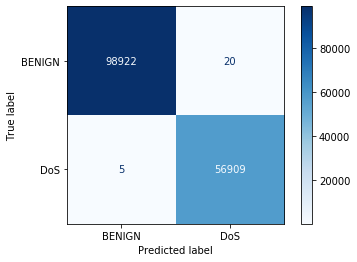

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(search2, X_val, y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);

In [33]:
search2_model = XGBClassifier(gamma=0,learning_rate=0.43,max_depth=4,n_estimators=130).fit(X_train, y_train)

AUC: 1.00


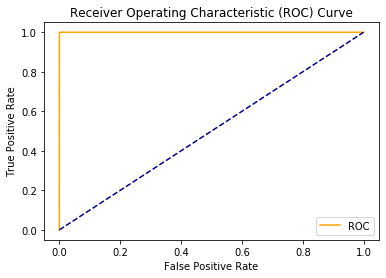

In [38]:
# We also would have a very neat AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = search2_model.predict_proba(X_val)
probs = probs[:, 1]                        # see for positive class only
auc = roc_auc_score(y_val, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, probs)
plot_roc_curve(fpr, tpr)

In [37]:
# Saving model
pickle.dump(search2_model, open('grid_model', 'wb'))

## Trying Normalisation
- Dosen't need Standardisation as we are not dealing with Gaussian Distribution or any such algorithms.

*Normalising led to poorer results, so omitting it.*

## Feature Engineering

In [80]:
train_df_engineered = train_df.copy()
train_df_engineered['Remaining Packets at Server'] = train_df_engineered['Total Fwd Packets'] - train_df_engineered['Total Backward Packets']
train_df_engineered['Total Server Time Utilised'] = train_df_engineered['Active Max'] + train_df_engineered['Idle Max']
train_df_engineered['Length of Transcation'] = abs(train_df_engineered['Total Length of Bwd Packets']-train_df_engineered['Total Length of Fwd Packets'])
train_df_engineered['Avg Segment Size'] = abs(train_df_engineered['Avg Bwd Segment Size']-train_df_engineered['Avg Fwd Segment Size'])
train_df_engineered['Subflow Avg Bytes'] = abs(train_df_engineered['Subflow Bwd Bytes']-train_df_engineered['Subflow Fwd Bytes'])

In [31]:
selected_cols = ['Destination Port','Flow Duration','Remaining Packets at Server','Total Server Time Utilised',
                'Length of Transcation','Avg Segment Size','Subflow Avg Bytes','Fwd IAT Total', 'Packet Length Mean',
                 'Average Packet Size', 'Fwd Header Length','Label_Encoded','Fwd PSH Flags','FIN Flag Count',
                 'SYN Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count']
selected_df = train_df_engineered[selected_cols]

In [32]:
# # tuned model
# X = selected_df.drop(labels=['Label_Encoded'], axis=1)
# y = selected_df['Label_Encoded']
# X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape
# model_xg = XGBClassifier(colsample_bytree=1,early_stopping_rounds=3,learning_rate=0.07,max_depth=10,min_child_weight=50, n_estimators=200, n_jobs=-1, reg_alpha=3000, reg_lambda=2000,silent=1)
# model_xg.fit(X_train,y_train)
# y_preds = model_xg.predict(X_val)
# confusion_matrix(y_val, y_preds)

## Feature Selection

In [44]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X,y)

In [50]:
sorted_mutual_scores = pd.DataFrame(zip(X.columns,mic), columns=['Feature','Mutual Score']).sort_values(by='Mutual Score', ascending=False).reset_index()
sorted_mutual_scores

,index,Feature,Mutual Score
0,66,Init_Win_bytes_forward,0.532519
1,40,Packet Length Mean,0.477744
2,52,Average Packet Size,0.475966
3,12,Bwd Packet Length Mean,0.471582
4,54,Avg Bwd Segment Size,0.471458
5,39,Max Packet Length,0.468665
6,65,Subflow Bwd Bytes,0.464943
7,0,Destination Port,0.464667
8,5,Total Length of Bwd Packets,0.463866
9,10,Bwd Packet Length Max,0.450047


In [53]:
signigicant_features = sorted_mutual_scores['Feature'][:30].values
signigicant_features

array(['Init_Win_bytes_forward', 'Packet Length Mean',
       'Average Packet Size', 'Bwd Packet Length Mean',
       'Avg Bwd Segment Size', 'Max Packet Length', 'Subflow Bwd Bytes',
       'Destination Port', 'Total Length of Bwd Packets',
       'Bwd Packet Length Max', 'Flow IAT Max', 'Packet Length Variance',
       'Packet Length Std', 'Fwd Packet Length Max', 'Flow Duration',
       'Flow IAT Mean', 'Fwd Packets/s', 'Flow Packets/s', 'Fwd IAT Max',
       'Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Flow Bytes/s',
       'Bwd Packets/s', 'Bwd Header Length', 'Init_Win_bytes_backward',
       'Fwd IAT Mean', 'Fwd IAT Total', 'Bwd Packet Length Std',
       'Flow IAT Std', 'Avg Fwd Segment Size'], dtype=object)

In [54]:
model_lessfeatures = XGBClassifier(gamma=0,learning_rate=0.43,max_depth=4,n_estimators=130).fit(X_train[signigicant_features], y_train)

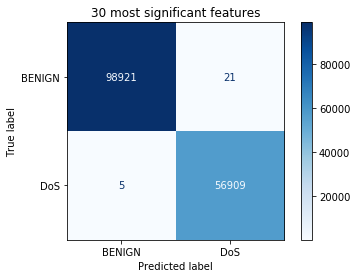

In [62]:
plot_confusion_matrix(model_lessfeatures, X_val[signigicant_features], y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);
plt.title("30 most significant features");

In [82]:
# find and remove correlated features as they mean the same as others
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

highly_corelated_features = correlation(X[signigicant_features],0.95)

In [83]:
signigicant_features2 = set(signigicant_features) - set(highly_corelated_features)
len(signigicant_features2)

19

In [74]:
model_lessfeatures2 = XGBClassifier(gamma=0,learning_rate=0.43,max_depth=4,n_estimators=130).fit(X_train[signigicant_features2], y_train)

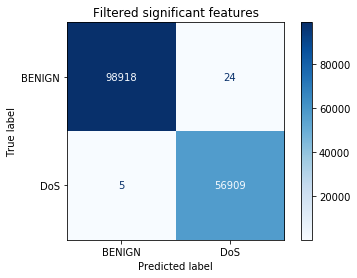

In [84]:
plot_confusion_matrix(model_lessfeatures2, X_val[signigicant_features2], y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);
plt.title("Filtered significant features");

So, reducing features from 30 to 19, removing corelated features **does not effect Recall**, but very tiny effects **Precision**, and that's okay for now.

## Re-Modelling with Selected Features
- Selecting 19 Best Features

In [86]:
X_train, X_val, y_train, y_val = train_test_split(X[signigicant_features2],y,test_size=0.3)
model_sxg = XGBClassifier(colsample_bytree=1,learning_rate=0.04,max_depth=4, n_estimators=150, n_jobs=-1)
model_sxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

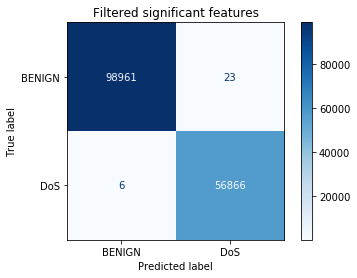

In [90]:
plot_confusion_matrix(model_lessfeatures2, X_val[signigicant_features2], y_val, cmap=plt.cm.Blues, display_labels=target_encoder.classes_);
plt.title("Filtered significant features");

In [105]:
y_preds = model_sxg.predict(X_val)

In [165]:
# Saving model
pickle.dump(model_sxg, open('final_model_xgboost.pkl', 'wb'))

## Evaluating Model Weaknesses

In [150]:
predictions = pd.concat([pd.Series(y_val), pd.Series(y_preds)], axis=1)
predictions.columns = ['Actual','Prediced']

In [151]:
len(X_val), len(predictions)

(155856, 155856)

In [152]:
overall = pd.concat([X_val.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
overall.head()

,Subflow Fwd Bytes,Init_Win_bytes_forward,Flow Bytes/s,Packet Length Variance,Fwd Packet Length Max,Flow IAT Max,Avg Fwd Segment Size,Bwd Packet Length Mean,Flow Packets/s,Fwd IAT Mean,Subflow Bwd Bytes,Init_Win_bytes_backward,Bwd Packets/s,Destination Port,Packet Length Mean,Max Packet Length,Fwd Packets/s,Flow Duration,Flow IAT Mean,Actual,Prediced
0,3464,29200,4.760932e+02,535929.499400,1163,10000000,75.304348,950.314815,0.869085,2556275.0,51317,146,0.469306,443,542.386139,2896,0.399779,115063606,1.162259e+06,0,0
1,0,251,0.000000e+00,0.000000,0,211,0.000000,0.000000,9478.672986,211.0,0,-1,0.000000,80,0.000000,0,9478.672986,211,2.110000e+02,1,1
2,213,-1,1.202355e+01,2182.666667,85,43900000,71.000000,157.333333,0.105316,28500000.0,472,-1,0.052658,53,109.000000,163,0.052658,56971544,1.140000e+07,0,0
3,0,274,0.000000e+00,0.000000,0,49,0.000000,0.000000,40816.326530,49.0,0,-1,0.000000,80,0.000000,0,40816.326530,49,4.900000e+01,1,1
4,90,-1,1.067164e+06,842.700000,45,266,45.000000,98.000000,14925.373130,1.0,196,-1,7462.686567,53,66.200000,98,7462.686567,268,8.933333e+01,0,0


Continuation...
We can check for the points where exactly the model went wrong, due to which data and then perform feature engineering.
There's a lot we can do but the project time limit is very small and much of the time is utilised in iterating training models.

## Submission File

In [162]:
test_df = pd.read_csv('IDS_test_data.csv')
test_df.shape

(173176, 79)

In [164]:
signigicant_features = ['Avg Fwd Segment Size', 'Bwd Packet Length Mean', 'Bwd Packets/s',
 'Destination Port', 'Flow Bytes/s', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Packets/s',
 'Fwd IAT Mean', 'Fwd Packet Length Max', 'Fwd Packets/s', 'Init_Win_bytes_backward', 'Init_Win_bytes_forward',
 'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'Subflow Bwd Bytes', 'Subflow Fwd Bytes']

In [161]:
test_df.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,34600,15372,2,1,0,6,0,0,0.000000,0.000000,6,6,6.0,0.000000,390.320063,1.951600e+02,7686.000,1.059670e+04,15179,193,15372,15372.0,0.000000e+00,15372,15372,0,0.0,0.00000,0,0,0,0,0,0,64,20,1.301067e+02,65.053344,0,6,1.500000,3.000000,9.000,0,0,0,0,1,0,0,0,0,2.000000,0.000000,6.0,64,0,0,0,0,0,0,2,0,1,6,235,0,0,32,0.0,0.0,0,0,0.0,0.0,0,0
1,1,80,82507120,7,6,419,11595,413,0,59.857143,155.737416,4344,0,1932.5,1754.831473,145.611676,1.575622e-01,6875593.333,2.380000e+07,82400000,2,82400000,13700000.0,3.360000e+07,82400000,2,141384,28276.8,56625.04294,129151,16,0,0,0,0,220,200,8.484116e-02,0.072721,0,4344,858.142857,1458.803032,2128106.286,0,0,0,0,1,0,0,0,0,924.153846,59.857143,1932.5,220,0,0,0,0,0,0,7,419,6,11595,251,235,2,20,991.0,0.0,991,991,82400000.0,0.0,82400000,82400000
2,2,80,187,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,64171.122990,1.069519e+04,187.000,0.000000e+00,187,187,187,187.0,0.000000e+00,187,187,0,0.0,0.00000,0,0,0,0,0,0,40,0,1.069519e+04,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,253,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,3,80,142523,3,6,307,11595,307,0,102.333333,177.246533,4344,0,1932.5,1754.831473,83509.328320,6.314770e+01,17815.375,4.555889e+04,130178,10,11995,5997.5,7.092988e+03,11013,982,142513,28502.6,57073.29573,130178,48,0,0,0,0,104,200,2.104923e+01,42.098468,0,4344,1190.200000,1623.884013,2636999.289,0,0,0,1,0,0,0,0,2,1322.444444,102.333333,1932.5,104,0,0,0,0,0,0,3,307,6,11595,29200,235,1,32,0.0,0.0,0,0,0.0,0.0,0,0
4,4,80,1,2,0,0,0,0,0,0.000000,0.000000,0,0,0.0,0.000000,0.000000,2.000000e+06,1.000,0.000000e+00,1,1,1,1.0,0.000000e+00,1,1,0,0.0,0.00000,0,0,0,0,0,0,64,0,2.000000e+06,0.000000,0,0,0.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.0,64,0,0,0,0,0,0,2,0,0,0,274,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [172]:
test_X = test_df[signigicant_features2]
print(len(test_X.columns))

# missing Values
test_df['Flow Bytes/s_missing'] = test_df['Flow Bytes/s'].apply(lambda x: 1 if np.isnan(x) else 0)
test_df['Flow Bytes/s'].fillna(-10, inplace=True)
print(train_df['Flow Bytes/s'].isna().sum())

# inf Values 
fb, fp = train_df['Flow Bytes/s'].quantile(0.99),train_df['Flow Packets/s'].quantile(0.99)
train_df['Flow Bytes/s'] = train_df['Flow Bytes/s'].apply(lambda x: fb*10000 if np.isinf(x) else x)
train_df['Flow Packets/s'] = train_df['Flow Packets/s'].apply(lambda x: fp*10000 if np.isinf(x) else x)

# drop singleton na's
train_df.dropna(inplace=True)
print([f'{f} -> {str(s)}' for f,s in zip(train_df.columns, train_df.isna().sum()) if s>0 ])

19
0
[]


In [215]:
# load the model from disk
loaded_model = pickle.load(open('final_model_xgboost.pkl', 'rb'))

In [216]:
y_test_preds = loaded_model.predict(test_X)

# load the scaler
encoder = pickle.load(open('encoder.pkl', 'rb'))

y_preds_submission = encoder.inverse_transform(y_test_preds)
y_preds_submission

array(['BENIGN', 'DoS', 'BENIGN', ..., 'DoS', 'DoS', 'DoS'], dtype=object)

In [226]:
assert len(y_preds_submission) == len(test_df)

In [243]:
submission_df = pd.concat([test_df['ID'],pd.Series(y_preds_submission)], axis=1)
submission_df.head()

,ID,0
0,0,BENIGN
1,1,DoS
2,2,BENIGN
3,3,DoS
4,4,DoS


In [242]:
submission_df.to_csv("submission_file.csv", index = None)

# Thanks for project.
Got to learn something new.